In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
# as = alias

%matplotlib inline

# Load DataSet

In [2]:
basePath = '~/Git/DSSchool_Study/lectureMaterials/sample_data_bikeSharingDemand/'
train = pd.read_csv(basePath + 'train.csv', parse_dates=["datetime"])
test = pd.read_csv(basePath + 'test.csv', parse_dates=["datetime"])
sampleSusbmission = pd.read_csv(basePath + 'sampleSubmission.csv')

# Preprocessing

In [3]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

In [4]:
train.shape

(10886, 19)

In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [6]:
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second
test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

In [7]:
test.shape

(6493, 16)

In [8]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3


In [9]:
dayofhumanizedlist = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

for index in range(6):
    train.loc[train["datetime-dayofweek"] == index, 
              "datetime-dayofweek(humanized)"] = dayofhumanizedlist[index]
    test.loc[test["datetime-dayofweek"] == index, 
              "datetime-dayofweek(humanized)"] = dayofhumanizedlist[index]

In [10]:
train[["datetime", "datetime-dayofweek", "datetime-dayofweek(humanized)"]].head()

,datetime,datetime-dayofweek,datetime-dayofweek(humanized)
0,2011-01-01 00:00:00,5,Sat
1,2011-01-01 01:00:00,5,Sat
2,2011-01-01 02:00:00,5,Sat
3,2011-01-01 03:00:00,5,Sat
4,2011-01-01 04:00:00,5,Sat


In [11]:
test[["datetime", "datetime-dayofweek", "datetime-dayofweek(humanized)"]].head()

,datetime,datetime-dayofweek,datetime-dayofweek(humanized)
0,2011-01-20 00:00:00,3,Thu
1,2011-01-20 01:00:00,3,Thu
2,2011-01-20 02:00:00,3,Thu
3,2011-01-20 03:00:00,3,Thu
4,2011-01-20 04:00:00,3,Thu


# Explore

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


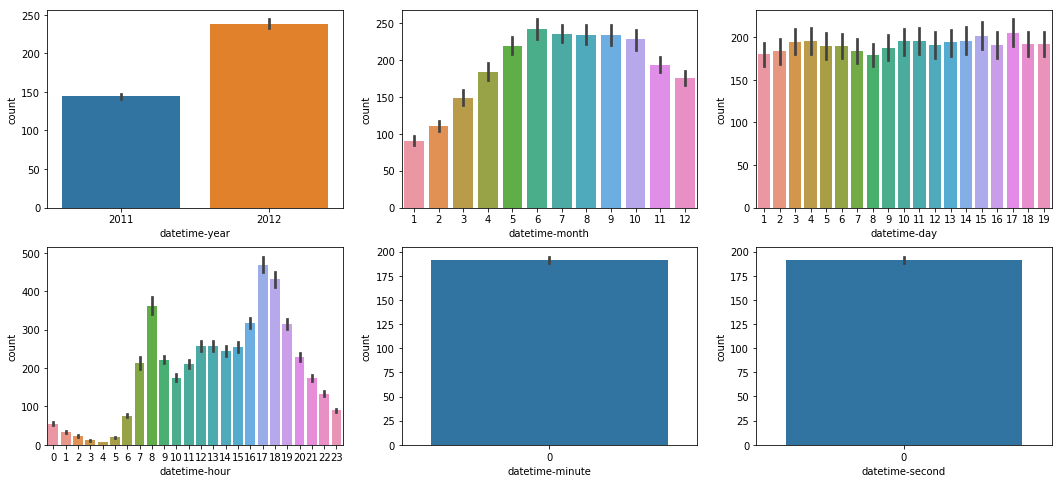

In [12]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

### datetime-year & datetime-month

In [13]:
train["datetime-year_month"] = train["datetime-year"].astype('str') + "-" + train["datetime-month"].astype('str')

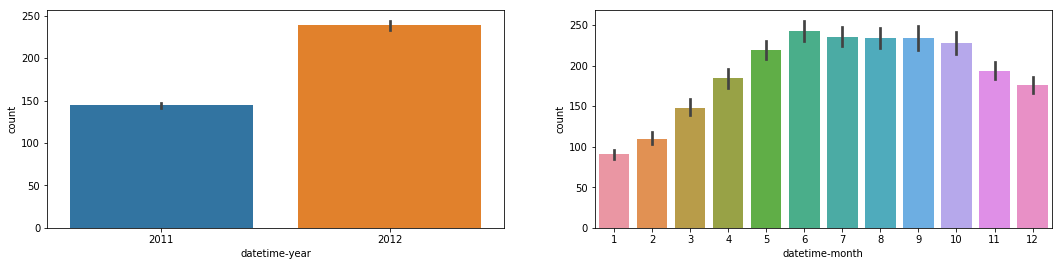

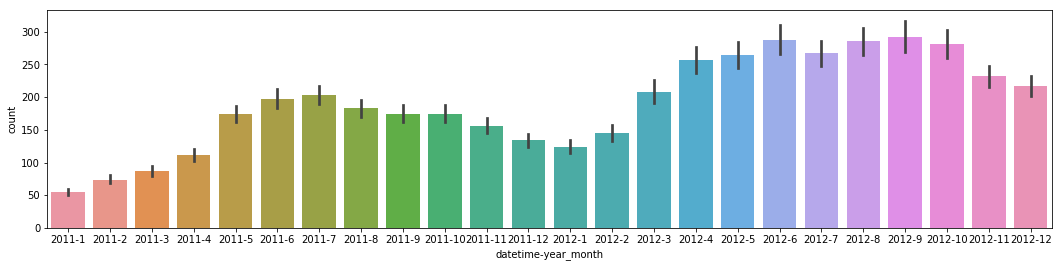

In [14]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)

figure, (ax3) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="datetime-year_month", y="count", ax=ax3)

# GridSpec

AxesSubplot(0.125,0.657941;0.227941x0.222059)
AxesSubplot(0.125,0.391471;0.227941x0.222059)


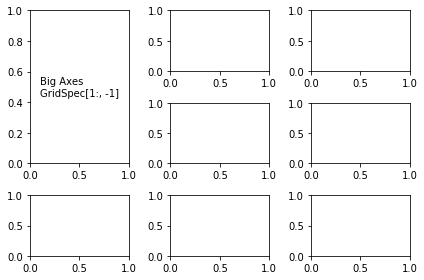

In [70]:
fig, axs = plt.subplots(ncols=3, nrows=3)
gs = axs[0, 1].get_gridspec()
# remove the underlying axes
print(gs[0:2, 0])
for ax in axs[0:2, 0]:
    print(ax)
    ax.remove()
axbig = fig.add_subplot(gs[0:2, 0])
axbig.annotate('Big Axes \nGridSpec[1:, -1]', (0.1, 0.5),
               xycoords='axes fraction', va='center')

fig.tight_layout()

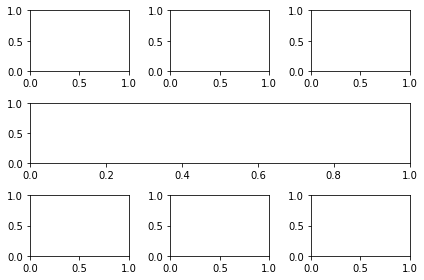

In [74]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(3, 3)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(ncols=3, nrows=3)
ax4.remove()
ax5.remove()
ax6.remove()
fig.add_subplot(gs[1, 0:])
fig.tight_layout()